# Analysis of Even/Odd Buckets

This notebook analyzes the relationship between `n`, `k`, and `buckets` from the `df_evenOdd.csv` dataset to find a formula that estimates the number of buckets.

### 1. Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('df_evenOdd.csv')
df.head()

,n,k,buckets
0,3,2,3
1,5,2,9
2,7,4,20
3,9,4,61
4,11,6,100


### 2. Exploratory Data Analysis

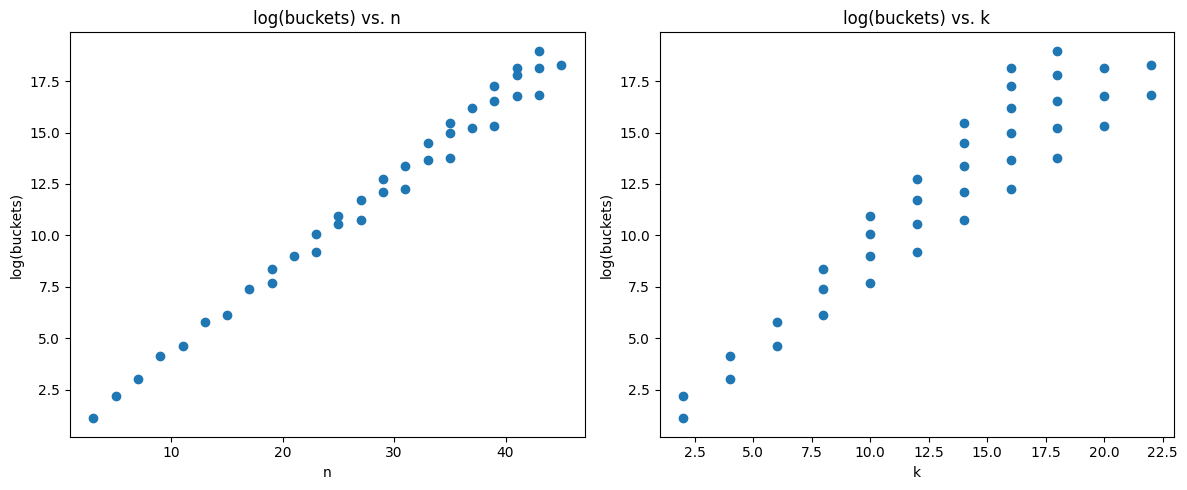

In [2]:
# Add a new column for the natural logarithm of 'buckets'
df['log_buckets'] = np.log(df['buckets'])

# Visualize the relationships
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['n'], df['log_buckets'])
plt.xlabel('n')
plt.ylabel('log(buckets)')
plt.title('log(buckets) vs. n')

plt.subplot(1, 2, 2)
plt.scatter(df['k'], df['log_buckets'])
plt.xlabel('k')
plt.ylabel('log(buckets)')
plt.title('log(buckets) vs. k')

plt.tight_layout()
plt.show()

### 3. Model Training

In [3]:
# Prepare the data for the model
X = df[['n', 'k']]
y = df['log_buckets']

# Fit a multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the model coefficients
intercept = model.intercept_
coefficients = model.coef_

print(f"Intercept: {intercept}")
print(f"Coefficients (n, k): {coefficients}")

Intercept: 0.3152651769694632
Coefficients (n, k): [ 0.60691443 -0.42186356]


### 4. Define the Estimation Function

In [4]:
def estimate_buckets(n, k):
    """
    Estimates the number of buckets based on n and k using a logarithmic model.
    """
    # log(buckets) = intercept + coef_n * n + coef_k * k
    log_buckets_pred = intercept + coefficients[0] * n + coefficients[1] * k

    # buckets = e^(log(buckets))
    return np.exp(log_buckets_pred)

# Example usage:
estimate_buckets(19, 10)

np.float64(2054.943683134963)

### 5. Evaluate Model Performance

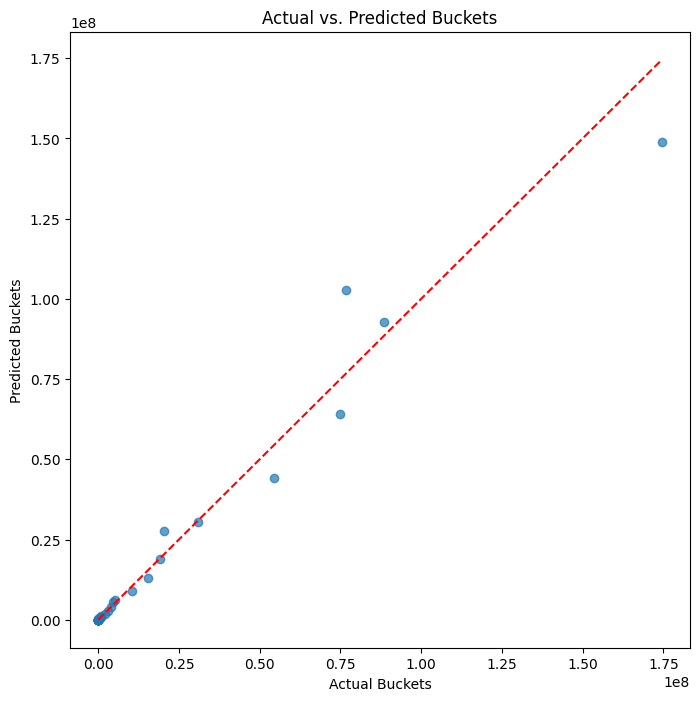

R-squared score: 0.9989793315996693


In [5]:
# Add predicted values to the DataFrame
df['predicted_buckets'] = estimate_buckets(df['n'], df['k'])

# Visualize actual vs. predicted values
plt.figure(figsize=(8, 8))
plt.scatter(df['buckets'], df['predicted_buckets'], alpha=0.7)
plt.xlabel('Actual Buckets')
plt.ylabel('Predicted Buckets')
plt.title('Actual vs. Predicted Buckets')
# Add a line for perfect prediction
max_val = max(df['buckets'].max(), df['predicted_buckets'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--')
plt.show()

# Calculate R-squared score
r_squared = model.score(X, y)
print(f"R-squared score: {r_squared}")